### 사용 라이브러리

In [573]:
import pandas as pd
import numpy as np

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 소각시설

### 1.0 데이터 불러오기

In [574]:
df = pd.read_csv("./data/지방자치단체_폐기물_처리시설_현황_소각시설(10-19).csv",encoding="utf-8")
df2 = pd.read_csv("./data/지방자치단체_폐기물_처리시설_현황_매립시설(10-19).csv",encoding="utf-8")

### 2.0 데이터 탐색 및 전처리

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  170 non-null    int64 
 1   시도          170 non-null    object
 2   시설 수        170 non-null    object
 3   일별 시설용량(톤)  170 non-null    object
 4   1일평균가동시간    170 non-null    object
 5   처리량 (톤)     170 non-null    object
 6   설치비 (국비)    170 non-null    object
 7   설치비 (지방비)   170 non-null    object
 8   설치비 (기타)    170 non-null    object
 9   연간유지관리비     170 non-null    object
 10  관리인원        170 non-null    object
 11  외부공급(열)     170 non-null    object
 12  외부공급(전력)    170 non-null    object
 13  자체사용(열)     170 non-null    object
 14  자체사용(전력)    170 non-null    object
 15  연도          170 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 21.4+ KB


In [576]:
#첫번째 컬럼 삭제
df = df.drop(df.columns[[0]], axis=1)

In [577]:
#2010,2011 세종 '-' 결측 / 2018,2019 광주 '-' 결측
df.isnull().sum()
#'-'결측치 0으로 변경
df.replace('-', '0', inplace=True)

In [578]:
df['연도'] = df['연도'].astype('object')

df['시설 수'] = df['시설 수'].astype('int')

df['일별 시설용량(톤)'] = df['일별 시설용량(톤)'].astype('float')

df['1일평균가동시간'] = df['1일평균가동시간'].astype('float')

df['처리량 (톤)'] = df['처리량 (톤)'].astype('float')

df['설치비 (국비)'] = df['설치비 (국비)'].astype('float')

df['설치비 (지방비)'] = df['설치비 (지방비)'].astype('float')

df['설치비 (기타)'] = df['설치비 (기타)'].astype('float')

df['연간유지관리비'] = df['연간유지관리비'].astype('float')

df['관리인원'] = df['관리인원'].astype('int')

df['외부공급(열)'] = df['외부공급(열)'].astype('float')

df['외부공급(전력)'] = df['외부공급(전력)'].astype('float')

df['자체사용(열)'] = df['자체사용(열)'].astype('float')

df['자체사용(전력)'] = df['자체사용(전력)'].astype('float')


In [579]:
df.shape

(170, 15)

In [580]:
df.describe()

,시설 수,일별 시설용량(톤),1일평균가동시간,처리량 (톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,관리인원,외부공급(열),외부공급(전력),자체사용(열),자체사용(전력)
count,170.000000,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000,1.700000e+02,1.700000e+02
mean,10.617647,1003.864706,20.047059,2.568023e+05,50874.658824,136642.423529,51011.135294,26923.605882,209.717647,2.588961e+05,27345.929412,1.706589e+05,6.694962e+04
std,12.859769,1212.832637,5.856076,2.954927e+05,49470.440002,164863.343846,116631.922792,32850.454345,232.543416,4.108791e+05,52595.384358,2.216507e+05,1.759170e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,400.000000,19.000000,9.893450e+04,20542.000000,48970.000000,0.000000,8930.500000,56.000000,2.009800e+04,0.000000,4.641775e+04,5.822500e+02
50%,6.000000,591.000000,23.000000,1.543525e+05,44822.000000,78273.000000,11911.500000,16041.000000,108.000000,1.403190e+05,13.500000,8.853400e+04,2.438300e+04
75%,15.750000,930.000000,24.000000,2.628852e+05,61567.500000,144232.000000,46288.250000,27238.000000,279.250000,2.372022e+05,34104.500000,2.219738e+05,8.550800e+04
max,56.000000,5304.000000,24.000000,1.349194e+06,250761.000000,759593.000000,604104.000000,192531.000000,1157.000000,1.857502e+06,285307.000000,1.098394e+06,2.151151e+06


In [581]:
df.corr()

#시설 수와 처리량은 거의 상관관계가 없음.
#연간유지관리비와 관리인원은 상관관계가 높음.
#처리량과 외부공급(열)/자체사용(열)의 상관관계가 높은 것을 보아 대부분은 열에너지로 활용되는 것으로 추정됨.

,시설 수,일별 시설용량(톤),1일평균가동시간,처리량 (톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,관리인원,외부공급(열),외부공급(전력),자체사용(열),자체사용(전력)
시설 수,1.000000,0.266799,-0.295116,0.246991,0.483285,0.325620,0.326261,0.378704,0.577420,0.127121,0.083827,0.323533,0.167184
일별 시설용량(톤),0.266799,1.000000,0.246712,0.992557,0.761091,0.979458,0.867646,0.945992,0.883929,0.945751,0.158932,0.930929,0.486023
1일평균가동시간,-0.295116,0.246712,1.000000,0.262438,0.058083,0.203065,0.209039,0.214872,0.151355,0.277375,0.072740,0.170207,0.119921
처리량 (톤),0.246991,0.992557,0.262438,1.000000,0.756641,0.971360,0.844315,0.946891,0.873085,0.954929,0.157488,0.932218,0.477590
설치비 (국비),0.483285,0.761091,0.058083,0.756641,1.000000,0.800177,0.813691,0.833519,0.866386,0.594531,0.306956,0.815610,0.538799
설치비 (지방비),0.325620,0.979458,0.203065,0.971360,0.800177,1.000000,0.858701,0.951875,0.910118,0.908823,0.132395,0.935130,0.489433
설치비 (기타),0.326261,0.867646,0.209039,0.844315,0.813691,0.858701,1.000000,0.891229,0.893174,0.744247,0.181069,0.869855,0.561186
연간유지관리비,0.378704,0.945992,0.214872,0.946891,0.833519,0.951875,0.891229,1.000000,0.952117,0.870352,0.179285,0.925106,0.601539
관리인원,0.577420,0.883929,0.151355,0.873085,0.866386,0.910118,0.893174,0.952117,1.000000,0.752365,0.217965,0.879091,0.553433
외부공급(열),0.127121,0.945751,0.277375,0.954929,0.594531,0.908823,0.744247,0.870352,0.752365,1.000000,0.010774,0.874822,0.434474


### 3.0 시각적 EDA

In [582]:
df.describe()

,시설 수,일별 시설용량(톤),1일평균가동시간,처리량 (톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,관리인원,외부공급(열),외부공급(전력),자체사용(열),자체사용(전력)
count,170.000000,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000,1.700000e+02,1.700000e+02
mean,10.617647,1003.864706,20.047059,2.568023e+05,50874.658824,136642.423529,51011.135294,26923.605882,209.717647,2.588961e+05,27345.929412,1.706589e+05,6.694962e+04
std,12.859769,1212.832637,5.856076,2.954927e+05,49470.440002,164863.343846,116631.922792,32850.454345,232.543416,4.108791e+05,52595.384358,2.216507e+05,1.759170e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,400.000000,19.000000,9.893450e+04,20542.000000,48970.000000,0.000000,8930.500000,56.000000,2.009800e+04,0.000000,4.641775e+04,5.822500e+02
50%,6.000000,591.000000,23.000000,1.543525e+05,44822.000000,78273.000000,11911.500000,16041.000000,108.000000,1.403190e+05,13.500000,8.853400e+04,2.438300e+04
75%,15.750000,930.000000,24.000000,2.628852e+05,61567.500000,144232.000000,46288.250000,27238.000000,279.250000,2.372022e+05,34104.500000,2.219738e+05,8.550800e+04
max,56.000000,5304.000000,24.000000,1.349194e+06,250761.000000,759593.000000,604104.000000,192531.000000,1157.000000,1.857502e+06,285307.000000,1.098394e+06,2.151151e+06


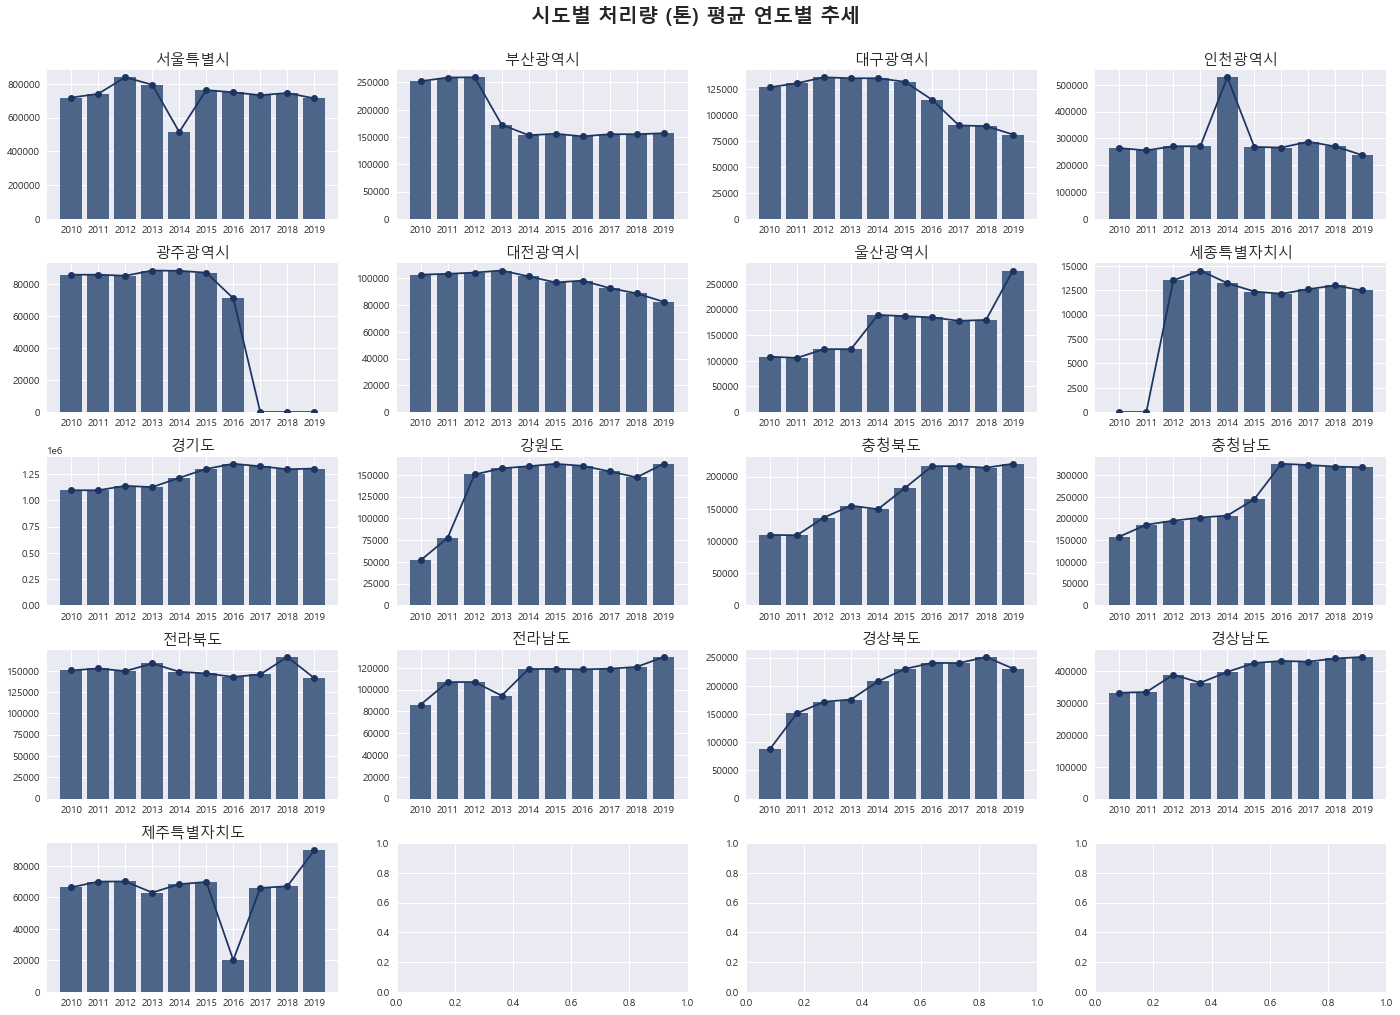

In [600]:
fig, axs = plt.subplots(5, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['시도'].unique():
    sido_condition = df['시도']== i
    df_temp = df[sido_condition].groupby(df['연도'])[['시설 수', '일별 시설용량(톤)', '1일평균가동시간','처리량 (톤)','관리인원','외부공급(열)','외부공급(전력)','자체사용(열)','자체사용(전력)']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], df_temp['처리량 (톤)'], color='#4c6588')
    axs[ax, ay].plot(df_temp['연도'], df_temp['처리량 (톤)'], color='#1b3461', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    # axs[ax, ay].set_yticks(list(range(0, 110000, 10000)))
    axs[ax, ay].set_xticks(list(df['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 처리량 (톤) 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()